In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc 

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{amssymb}')

In [2]:
def read_files(file, midia, method, class_):
    with open(file, 'r') as f:
        lines = f.readlines()
        for l in lines:
            if l != "\n":
                scores[midia][method][class_].append(list(eval(l)))

In [3]:
# stopwords
to_remove = ['eu', '15min', 'outra', 'Você', 'mim', 'mil', 'meu ', 'estava ', 'tudo ', 'umas ', 'No', 'venha', '2009',
            'essa', 'isso', 'É', 'E', 'esse', 'Esse', 'agora', 'tudo', 'vamos',  '42', '7h30m', '3º', 'disse', 'diz',
            'uma', "estão", "nosso", "todas", 'todo', 'todos', 'Nem', 'Todas', 'mas', 'No ', 'Os ', 'essa ', 'As ',
            'nosso ', 'agora ', 'mais ', 'todas ', 'vamos ', 'isso ', 'todo ', 'ponta ', 'ponta', 'ainda', 
             'ainda ', 'mês', 'mês ', 'Afinal', 'Afinal ', 'completa', 'completa ', 'minutos ',
            'minutos', 'Essa', 'como ', 'como', 'deve', 'deve ', '8ª', '12h30', '2022', 'rs', 'boas', 'fica', 'outro',
            'outro ']

In [4]:
scores = {}

for midia in ['estadao', 'folha', 'oglobo']:
    scores[midia] = {}
    for method in ['lime', 'shap']:
        scores[midia][method] = {}
        scores[midia][method][0] = []
        scores[midia][method][1] = []
        
        read_files('explanations_SHAP&LIME/explanations_by_midia/results_class_0_'+method+'_'+midia+'.txt', midia, method, 0)
        read_files('explanations_SHAP&LIME/explanations_by_midia/results_class_1_'+method+'_'+midia+'.txt', midia, method, 1)


In [5]:
def get_importance_vector(midia, method, balanced=False):
    aux = {}
    
    if midia == 'all':
        for c in [0, 1]:
            for m in ['estadao', 'folha', 'oglobo']:
                for lines in scores[m][method][c]:
                    for word, score in lines:
                        try:
                            aux[word].append(score)
                        except:
                            aux[word] = []
                            aux[word].append(score)
    else:
        for c in [0, 1]:
            for lines in scores[midia][method][c]:
                for word, score in lines:
                    try:
                        aux[word].append(score)
                    except:
                        aux[word] = []
                        aux[word].append(score)

    word_mean_importance = {}
    for word in aux:
        word_mean_importance[word] = np.mean(aux[word])

    if balanced:
        importance = {k: v for k, v in sorted(word_mean_importance.items(), key=lambda item: np.abs(item[1]), reverse=True)}
        new_dict = {}
        count_neg = 0
        count_pos = 0
        for i in importance:
            if i in to_remove:
                continue
            if importance[i] > 0 and count_pos < 10:
                count_pos += 1
                new_dict[i] = importance[i]
            elif importance[i] < 0 and count_neg < 10:
                count_neg += 1
                new_dict[i] = importance[i]
            if count_pos == 10 and count_neg == 10:
                return new_dict

    return {k: v for k, v in sorted(word_mean_importance.items(), key=lambda item: np.abs(item[1]), reverse=True)[:20]}

In [6]:
def bar_plot(importance_vector, f_name, words=None, Xc=0.05, method='Lime', midia=None):
    if words != None:
        x = words[::-1]
    else:
        x = list(importance_vector.keys())[::-1]
    y = list(importance_vector.values())[::-1]
    colors = []
    for i in y: 
        if i < 0:
            colors.append('blue')
        else:
            colors.append('red')

    bar_width = .45
    fig, ax = plt.subplots(figsize=(5, 12))

    plt.barh(x, y, color=colors, align='center', alpha=0.5, height = bar_width)

    plt.axvline(x = 0, color = 'grey', alpha=0.5) 
    if method == 'Lime':
        label = 'mean(LIME weight)'  
    elif method == 'Shap':
        label = 'mean(SHAP value)'
    
    if midia != None:
        label += '\n'+midia
    
    plt.xlabel(label, fontsize=18)
    
    plt.xticks(fontsize=16)
    plt.yticks([],[])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)

    plt.gca().spines['left'].set_linewidth(0.4)
    plt.gca().spines['left'].set_color('grey')

    for i in range(len(x)):
        if y[i] < 0:
            plt.text(-Xc, i+0.33, x[i], ha = 'right', fontsize=18)
        else:
            plt.text(Xc, i+0.33, x[i], ha = 'left', fontsize=18)
    
    plt.savefig(f_name, bbox_inches='tight')
    plt.show()

In [108]:
importance_estadao = get_importance_vector('estadao', 'lime', True)
importance_estadao.keys()

dict_keys(['Yonhap', 'Paz', 'Ataques', 'mensalão', 'ironia', 'cedeu', 'Depois', 'acordo', 'indica', 'mural', 'agosto', 'revela', 'derrota', 'fatos', 'expectativas', 'chute', 'indecisos', 'escândalo', 'pânico', 'embate'])

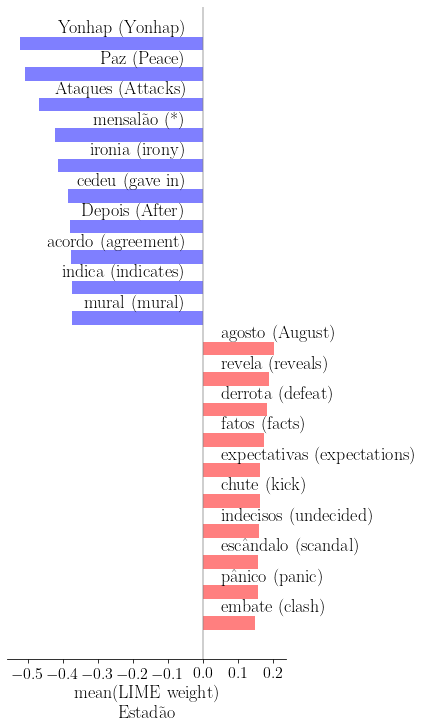

In [131]:
words = [    "Yonhap (Yonhap)",    "Paz (Peace)",    "Ataques (Attacks)",    "mensalão (*)",    "ironia (irony)",    "cedeu (gave in)",    "Depois (After)",    "acordo (agreement)",    "indica (indicates)",    "mural (mural)",    "agosto (August)",    "revela (reveals)",    "derrota (defeat)",    "fatos (facts)",    "expectativas (expectations)",    "chute (kick)",    "indecisos (undecided)",    "escândalo (scandal)",    "pânico (panic)",    "embate (clash)"]
bar_plot(importance_estadao, 'estadao_lime.jpeg', words, Xc=0.05, midia='Estadão')

In [110]:
importance_folha = get_importance_vector('folha', 'lime', True)
importance_folha.keys()

dict_keys(['confirmado', 'agredida', 'negaram', 'remarcar', 'títulos', 'avalia', 'reclamações', 'Teoricamente', 'perigo', 'usadas', 'Governador', 'favoreceu', 'golpe', 'Durante', 'superior', 'freado', 'mente', 'amargou', 'goleiro', 'enganou'])

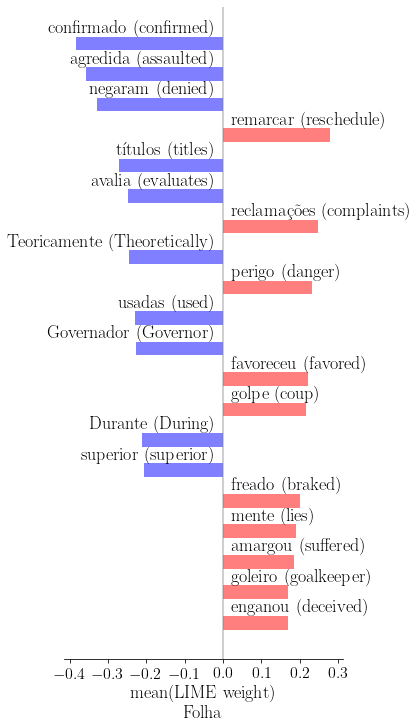

In [111]:
words = [    "confirmado (confirmed)",    "agredida (assaulted)",    "negaram (denied)",    "remarcar (reschedule)",    "títulos (titles)",    "avalia (evaluates)",    "reclamações (complaints)",    "Teoricamente (Theoretically)",    "perigo (danger)",    "usadas (used)",    "Governador (Governor)",    "favoreceu (favored)",    "golpe (coup)",    "Durante (During)",    "superior (superior)",    "freado (braked)",    "mente (lies)",    "amargou (suffered)",    "goleiro (goalkeeper)",    "enganou (deceived)"]
bar_plot(importance_folha, 'folha_lime.jpeg', words, Xc=0.02, midia='Folha')

In [77]:
importance_oglobo = get_importance_vector('oglobo', 'lime', True)
importance_oglobo.keys()

dict_keys(['anexadas', 'Extravagâncias', 'rejeitada', 'desavenças', 'petebista', 'tempos', 'Leia', 'indica', 'bonito', 'relator', 'calendário', 'transporte', 'decisivas', 'reformulação', 'boa', 'investimento', 'gol', 'encontro', 'raro', 'novamente'])

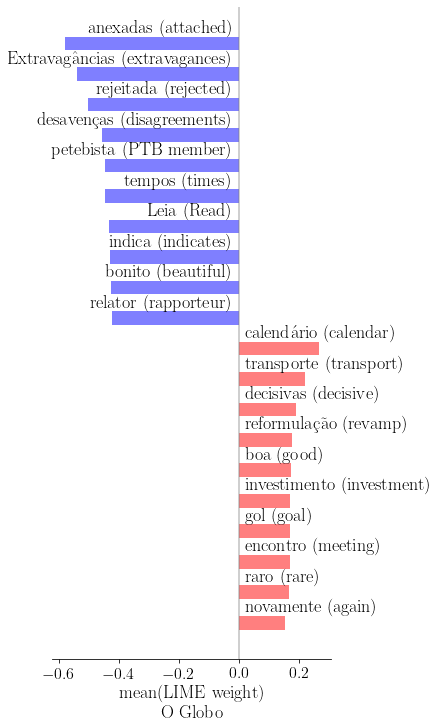

In [113]:
words = [    "anexadas (attached)",    "Extravagâncias (extravagances)",    "rejeitada (rejected)",    "desavenças (disagreements)",    "petebista (PTB member)",    "tempos (times)",    "Leia (Read)",    "indica (indicates)",    "bonito (beautiful)",    "relator (rapporteur)",    "calendário (calendar)",    "transporte (transport)",    "decisivas (decisive)",    "reformulação (revamp)",    "boa (good)",    "investimento (investment)",    "gol (goal)",    "encontro (meeting)",    "raro (rare)",    "novamente (again)"]
bar_plot(importance_oglobo, 'oglobo_lime.jpeg', words, Xc = 0.02, midia='O Globo')

In [114]:
importance_all = get_importance_vector('all', 'lime', True)
importance_all.keys()

dict_keys(['Yonhap', 'anexadas', 'Paz', 'agredida', 'Extravagâncias', 'negaram', 'Ataques', 'mensalão', 'confirmado', 'ironia', 'remarcar', 'rejeitada', 'desavenças', 'títulos', 'cedeu', 'reclamações', 'tempos', 'favoreceu', 'golpe', 'derrota'])

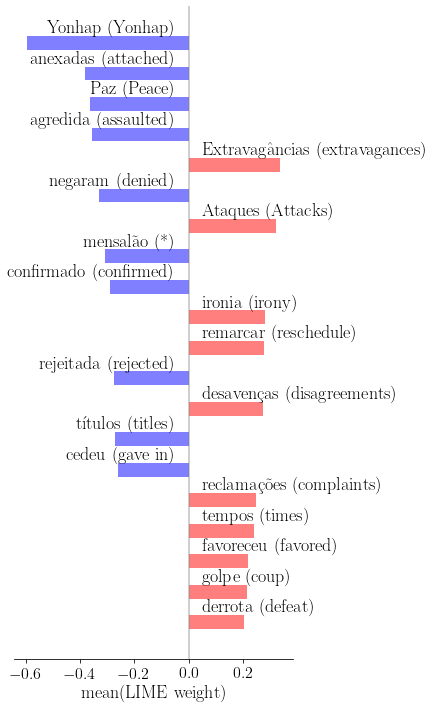

In [118]:
words = [    "Yonhap (Yonhap)",    "anexadas (attached)",    "Paz (Peace)",    "agredida (assaulted)",    "Extravagâncias (extravagances)",    "negaram (denied)",    "Ataques (Attacks)",    "mensalão (*)",    "confirmado (confirmed)",    "ironia (irony)",    "remarcar (reschedule)",    "rejeitada (rejected)",    "desavenças (disagreements)",    "títulos (titles)",    "cedeu (gave in)",    "reclamações (complaints)",    "tempos (times)",    "favoreceu (favored)",    "golpe (coup)",    "derrota (defeat)"]
bar_plot(importance_all, 'lime.jpeg', words, Xc=0.05)

In [119]:
importance_all = get_importance_vector('all', 'shap', True)
importance_all.keys()

dict_keys(['alfinetou', 'agredida', 'anterior', 'vicepresidências', 'vídeos', 'permissão', 'feridas', 'investimento', 'prata', 'Governador ', 'boas ', 'enganou ', 'desavenças ', 'idéia ', 'sentindo ', 'sonho ', 'decepcionante ', 'decisivas ', 'entusiasta ', 'tranqüilidade '])

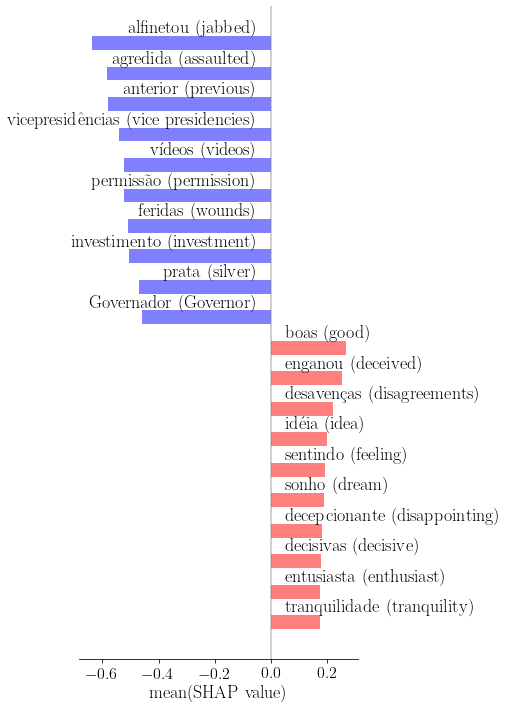

In [121]:
words = [    "alfinetou (jabbed)",    "agredida (assaulted)",    "anterior (previous)",    "vicepresidências (vice presidencies)",    "vídeos (videos)",    "permissão (permission)",    "feridas (wounds)",    "investimento (investment)",    "prata (silver)",    "Governador (Governor)",    "boas (good)",    "enganou (deceived)",    "desavenças (disagreements)",    "idéia (idea)",    "sentindo (feeling)",    "sonho (dream)",    "decepcionante (disappointing)",    "decisivas (decisive)",    "entusiasta (enthusiast)",    "tranquilidade (tranquility)"]
bar_plot(importance_all, 'shap.jpeg', words, Xc=0.05, method='Shap')

In [122]:
importance_estadao = get_importance_vector('estadao', 'shap', True)
importance_estadao.keys()

dict_keys(['vídeos', 'feridas', 'prata', 'Aprovada ', 'relata', 'crítico', 'diferença', 'fragmentação', 'processos', 'chilenos', 'idéia ', 'sonho ', 'decepcionante ', 'entusiasta ', 'celebridades ', 'verdadeira ', 'pânico ', 'expectativas ', 'liberdade ', 'embate '])

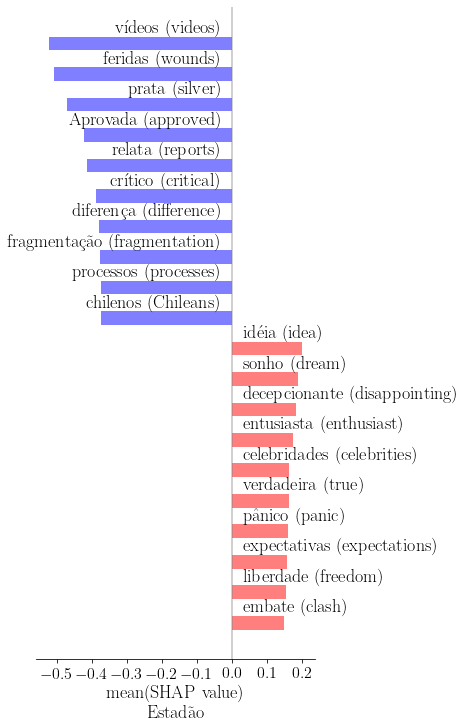

In [124]:
words= [    "vídeos (videos)",    "feridas (wounds)",    "prata (silver)",    "Aprovada (approved)",    "relata (reports)",    "crítico (critical)",    "diferença (difference)",    "fragmentação (fragmentation)",    "processos (processes)",    "chilenos (Chileans)",    "idéia (idea)",    "sonho (dream)",    "decepcionante (disappointing)",    "entusiasta (enthusiast)",    "celebridades (celebrities)",    "verdadeira (true)",    "pânico (panic)",    "expectativas (expectations)",    "liberdade (freedom)",    "embate (clash)"]
bar_plot(importance_estadao, 'estadao_shap.jpeg', words, Xc= 0.03, method='Shap', midia='Estadão')

In [127]:
importance_folha = get_importance_vector('folha', 'shap', True)
importance_folha.keys()

dict_keys(['alfinetou', 'agredida', 'permissão', 'Governador ', 'morreu', 'superior', 'Alckmin', 'Pesquisa ', 'hospital', 'Brancos ', 'enganou ', 'veio ', 'sentirse ', 'vanguarda ', 'flertar ', 'goleia ', 'repetidas ', 'golpe ', 'sempre ', 'temor '])

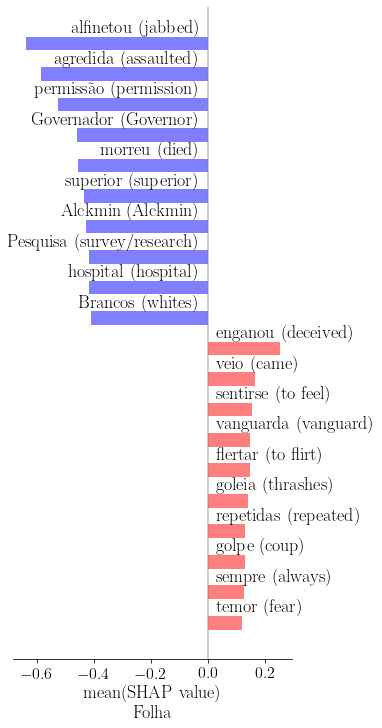

In [128]:
words = [    "alfinetou (jabbed)",    "agredida (assaulted)",    "permissão (permission)",    "Governador (Governor)",    "morreu (died)",    "superior (superior)",    "Alckmin (Alckmin)",    "Pesquisa (survey/research)",    "hospital (hospital)",    "Brancos (whites)",    "enganou (deceived)",    "veio (came)",    "sentirse (to feel)",    "vanguarda (vanguard)",    "flertar (to flirt)",    "goleia (thrashes)",    "repetidas (repeated)",    "golpe (coup)",    "sempre (always)",    "temor (fear)"]
bar_plot(importance_folha, 'folha_shap.jpeg', words, Xc=0.03, method='Shap', midia='Folha')

In [129]:
importance_oglobo = get_importance_vector('oglobo', 'shap', True)
importance_oglobo.keys()

dict_keys(['anterior', 'vicepresidências', 'investimento', 'PL', 'seguido', 'inflação', 'setembro', 'competições', 'empresários', 'France', 'boas ', 'desavenças ', 'sentindo ', 'decisivas ', 'tranqüilidade ', 'falência ', 'costurando ', 'sucesso ', 'ataques ', 'muitas '])

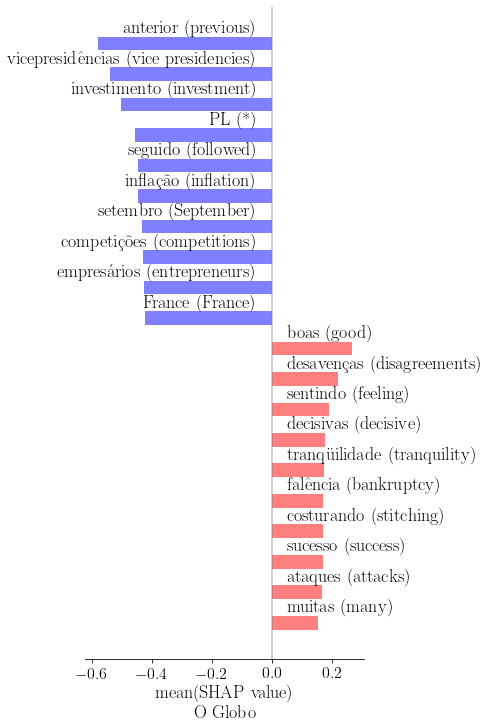

In [132]:
words = [    "anterior (previous)",    "vicepresidências (vice presidencies)",    "investimento (investment)",    "PL (*)",    "seguido (followed)",    "inflação (inflation)",    "setembro (September)",    "competições (competitions)",    "empresários (entrepreneurs)",    "France (France)",    "boas (good)",    "desavenças (disagreements)",    "sentindo (feeling)",    "decisivas (decisive)",    "tranqüilidade (tranquility)",    "falência (bankruptcy)",    "costurando (stitching)",    "sucesso (success)",    "ataques (attacks)",    "muitas (many)"]
bar_plot(importance_oglobo, 'oglobo_shap.jpeg',  words, Xc=0.05, method='Shap', midia='O Globo')

In [7]:
lime_importances = dict(scores['oglobo']['lime'][1][82])
phrase = 'Lula tem razão de tentar contê-la, porque os mais pobres é que sofrem.'

tokens = phrase.split(' ')
importance_vector = {}
for t in tokens:
    try:
        importance_vector[t] = lime_importances[t]
    except:
        importance_vector[t] = 0

In [8]:
importance_vector

{'Lula': -0.10422303774701473,
 'tem': 0,
 'razão': -0.02380421668277368,
 'de': 0,
 'tentar': 0.04579689099985117,
 'contê-la,': 0,
 'porque': 0.10185304775127474,
 'os': -0.037634270918482926,
 'mais': 0.03481711974564172,
 'pobres': -0.02056381798162162,
 'é': 0,
 'que': 0.0642457070238156,
 'sofrem.': 0}

In [9]:
x = "Lula is right to try to contain it, because it is the poorest who suffer"

importance_vector_en = {}
importance_vector_en['Lula'] = -0.10422303774701473
importance_vector_en['is'] = 0
importance_vector_en['right'] = -0.02380421668277368
importance_vector_en['to'] = 0
importance_vector_en['try to'] = 0.04579689099985117
importance_vector_en['contain it'] = 0
importance_vector_en['because'] = 0.10185304775127474
importance_vector_en['it is'] = -0.037634270918482926
importance_vector_en['the poorest'] = 0.03481711974564172
importance_vector_en['who'] =  0.0642457070238156
importance_vector_en['suffer'] = 0

In [16]:
def bar_plot_one_instance(importance_vector, f_name, words=None, Xc=0.05, method='Lime', midia=None):
    if words != None:
        x = words
    else:
        x = list(importance_vector.keys())
    y = list(importance_vector.values())
    colors = []
    for i in y: 
        if i < 0:
            colors.append('blue')
        else:
            colors.append('red')

    bar_width = .45
    fig, ax = plt.subplots(figsize=(15, 5))

    plt.bar(x, y, color=colors, align='center', alpha=0.5)
    plt.hlines(y=0, xmin=-1, xmax = len(x), color = 'grey', alpha=0.5)

    
    plt.ylabel('SHAP value', fontsize=26)
    plt.xticks(fontsize=26, rotation=45)
    plt.yticks(fontsize=18)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)

    plt.gca().spines['left'].set_linewidth(0.4)
    plt.gca().spines['left'].set_color('grey')
    ax.set_xlim(left=-0.5)

    
    plt.savefig(f_name, bbox_inches='tight')
    plt.show()

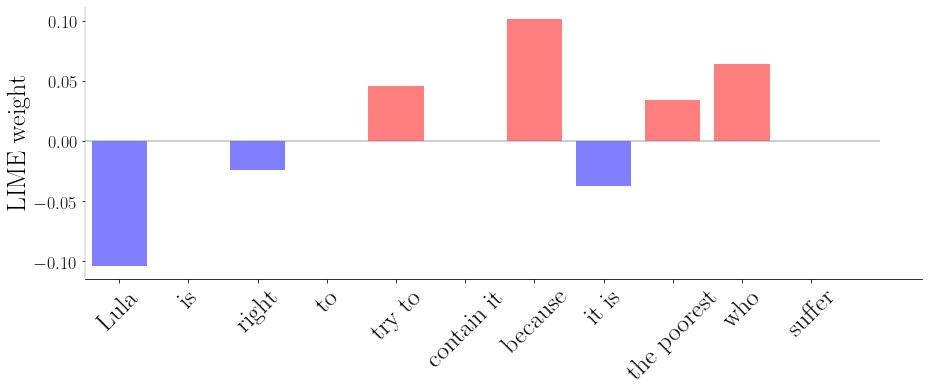

In [15]:
bar_plot_one_instance(importance_vector_en, 'instance_lime.jpg', words=None, Xc=0.05, method='Lime', midia=None)

In [17]:
shap_importances = dict(scores['oglobo']['shap'][1][82])
phrase = 'Lula tem razão de tentar contê-la, porque os mais pobres é que sofrem.'

tokens = phrase.split(' ')
importance_vector = {}
for t in tokens:
    try:
        importance_vector[t] = shap_importances[t]
    except:
        try: 
            importance_vector[t+' '] = shap_importances[t]
        except:
            importance_vector[t] = 0

In [18]:
shap_importances

{'Lula ': -0.22547625564038754,
 'tem ': -0.043597256764769554,
 'razão ': -0.03345932252705097,
 'de ': -0.05541442520916462,
 'tentar ': 0.04576674476265907,
 'contêla ': -0.03876034542918205,
 'porque ': 0.03090875782072544,
 'os ': -0.07529290206730366,
 'mais ': 0.08241522312164307,
 'pobres ': 0.012277260422706604,
 'é ': 0.027206141501665115,
 'que ': 0.07576374337077141,
 'sofrem': -0.20886702835559845}

In [19]:
x = "Lula is right to try to contain it, because it is the poorest who suffer"

importance_vector_en = {}
importance_vector_en['Lula'] = -0.22547625564038754
importance_vector_en['is'] = -0.043597256764769554
importance_vector_en['right'] = -0.03345932252705097
importance_vector_en['to'] = -0.05541442520916462
importance_vector_en['try to'] = 0.04576674476265907
importance_vector_en['contain it'] = -0.03876034542918205
importance_vector_en['because'] = 0.03090875782072544
importance_vector_en['it is'] = -0.07529290206730366
importance_vector_en['the poorest'] =  0.08241522312164307
importance_vector_en['who'] =  0.07576374337077141
importance_vector_en['suffer'] =  -0.20886702835559845

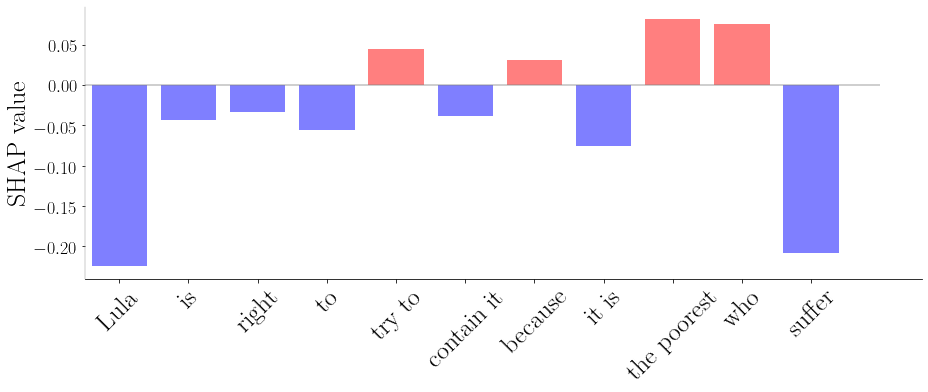

In [20]:
bar_plot_one_instance(importance_vector_en, 'instance_shap.jpg', words=None, Xc=0.05, method='Shap', midia=None)